<a href="https://colab.research.google.com/github/datagrad/Leads-Scoring-Case-Study/blob/main/Lead_Score_Case_Study_Kamal_Kumar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <span style="color:darkred"><u><center> **Lead Scoring Case Study**


# <span style="color:IndianRed ;">1. Project Requirement and Artifacts

####**Online Course Leads**


The online courses company sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website through various websites and search engines to browse for the courses. </br>
Once a person lands on the website, they might indulge in various activities like browsing the courses or filling up a form for the course or watch some videos. When a person fill up a form providing their email address or phone number, they are classified to be a **Lead**.</br>
Once a visit has ben converted into lead, the sales team starts communicating with them to get them converted into buying their courses. From the past experience, the `typical lead conversion rate` at *X education* is noted to be around `30%`.

To improve the conversion rate and hence making the sales team more efficient, the company is intended to identify the most potential leads, as **Hot Leads**. With this, the sales team can focus more on conversion of a potential customer rather than wasting time on those whose chances of conversion is very less.



####**Working of Lead Conversion Process**

An ideal lead conversion process to be followed at X-education is completed in multiple steps: </br>


1.   Social Media Marketing pulls the visitors on the website
2.   The Visitor fills the form with their contact and interest details
3.   Sales team collects the initial pool of the data 
4.   **Lead Nurturing (Identify the Hot Leads after educating them about the products and benefits)** 
5.   Lead Conversion

Here, as we progress in the stages we are left only with concrete leads, which have higher chances of getting converted. Since, we are already given with the lead pool, **the main focus of our case study will revolve around the Lead Nurturing / Hot Leads Identification**.



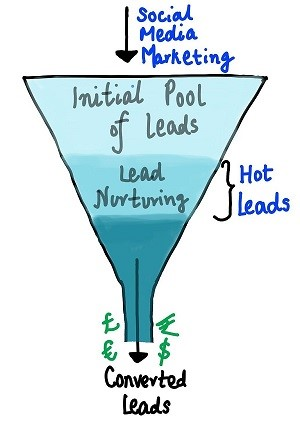<center>

####**Business Objective**
This Lead scoring project for a course content will help them with less time wastage over the poor conversion score. With this, we will try:
1.	To build a model wherein we can assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. 

2.	The model build shall be able to profide atleast 80% efficient leads (conversion rate ~ 80%) after they have passed through the model.


####**Project Goal**
With this Case study, we will try:

1.	Build a Logistic Regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score means higher chances of getting converted and vice-versa.
2.	Identify the challenges and strategy to overcome them. The model should be self-adjusting to identify such challenges and overcome them as and when required in the future.

3.	Present the recommendations to better on identification and conversion on their merit..


# <span style="color:IndianRed ;">2. Reading and Understanding the Data

Let us import all the required libraries, and read the dataset

In [ ]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importing all required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.float_format = '{:.2f}'.format

# Setting display options for pandas columns and rows 
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

In [ ]:
# Importing dataset

lead_df = pd.read_csv('Leads.csv')
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.00,0,0.00,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.00,674,2.50,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.00,20.00,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.00,17.00,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.00,18.00,No,No,Modified


In [ ]:
# inspect the dataframe

print(lead_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [ ]:
#shape of dataframe
print(lead_df.shape)


(9240, 37)


In [ ]:
# inspect the dataframe to check null values percentage in each column

percent_missing = round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2)
print(percent_missing)


Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                         26.63
Specialization                                  15.56
How did you hear about X Education              23.89
What is your current occupation                 29.11
What matters most to you in choosing a course   29.32
Search                                           0.00
Magazine                                         0.00
Newspaper Article           

In [ ]:
# inspect the dataframe for Numerical variables

lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.00,9240.00,9103.00,9240.00,9103.00,5022.00,5022.00
mean,617188.44,0.39,3.45,487.70,2.36,14.31,16.34
std,23406.00,0.49,4.85,548.02,2.16,1.39,1.81
min,579533.00,0.00,0.00,0.00,0.00,7.00,11.00
25%,596484.50,0.00,1.00,12.00,1.00,14.00,15.00
50%,615479.00,0.00,3.00,248.00,2.00,14.00,16.00
75%,637387.25,1.00,5.00,936.00,3.00,15.00,18.00
max,660737.00,1.00,251.00,2272.00,55.00,18.00,20.00


# <span style="color:IndianRed ;">3. Data Cleaning

In [ ]:
# check for percentage of null values in each column

percent_missing = round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2)
print(percent_missing)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                         26.63
Specialization                                  15.56
How did you hear about X Education              23.89
What is your current occupation                 29.11
What matters most to you in choosing a course   29.32
Search                                           0.00
Magazine                                         0.00
Newspaper Article           

There are few columns with more than 30% null values.

In [ ]:
# Check the duplicate values

lead_df[lead_df.duplicated(keep=False)]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


There are no duplicate values in the data.


#### Handling **Select** in variables
Following columns have a value called select. 
Convert those values as nan since the customer has not selected any options for these columns while entering the data.

•	Specialization </br>
•	How did you hear about X Education</br>
•	Lead Profile</br>
•	City



In [ ]:
# Converting 'Select' values to NaN.

lead_df = lead_df.replace('Select', np.nan)


In [ ]:
# Re-check for percentage of null values in each column

percent_missing = round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2)
print(percent_missing)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                         26.63
Specialization                                  36.58
How did you hear about X Education              78.46
What is your current occupation                 29.11
What matters most to you in choosing a course   29.32
Search                                           0.00
Magazine                                         0.00
Newspaper Article           

In [ ]:
# Let us drop the following columns that have more than 30% null values
cols = lead_df.columns

for i in cols:
    if((100*(lead_df[i].isnull().sum()/len(lead_df.index))) >= 30):
        lead_df.drop(i, 1, inplace = True)


In [ ]:
# check for percentage of null values in each column after dropping columns with more than 30% null values

percent_missing = round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2)
print(percent_missing)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                         26.63
What is your current occupation                 29.11
What matters most to you in choosing a course   29.32
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                   

Following columns have null values :
- Lead Source
- Total Visits
- Page Views Per Visit
- Last Activity    
- Country
- What is your current occupation
- What matters most to you in choosing a course
    
Let us see and decide whather we need to impute values in the above column or drop the columns.

In [ ]:
# Lets check the number of unique value counts for each values of remaining variables

lead_df.nunique().sort_values()

Receive More Updates About Our Courses              1
I agree to pay the amount through cheque            1
Magazine                                            1
Get updates on DM Content                           1
Update me on Supply Chain Content                   1
Search                                              2
A free copy of Mastering The Interview              2
Newspaper                                           2
Digital Advertisement                               2
X Education Forums                                  2
Newspaper Article                                   2
Converted                                           2
Do Not Call                                         2
Do Not Email                                        2
Through Recommendations                             2
What matters most to you in choosing a course       3
Lead Origin                                         5
What is your current occupation                     6
Last Notable Activity       

Drop the Not Required columns, which are clearly having no impact on conversion. The first five with only one option for variables will not help in modeling while Prospect ID and Lead Number are just indicative key for each leads.


•	Get updates on DM Content </br>
•	I agree to pay the amount through cheque </br>
•	Receive More Updates About Our Courses  </br>
•	Magazine </br>
•	Update me on Supply Chain Content</br>
•	Prospect ID</br>
•	Lead Number</br>


In [ ]:
#Dropping the above mentioned columns
lead_df.drop(['Get updates on DM Content', 'I agree to pay the amount through cheque', 'Receive More Updates About Our Courses', 'Magazine','Update me on Supply Chain Content','Prospect ID', 'Lead Number'], 1, inplace = True)

In [ ]:
# Lets check the value counts for each values in the country column

lead_df.Country.value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
Germany                    4
Canada                     4
South Africa               4
Nigeria                    4
Sweden                     3
Italy                      2
China                      2
Netherlands                2
Belgium                    2
Philippines                2
Ghana                      2
Bangladesh                 2
Asia/Pacific Region        2
Uganda                     2
Kenya                      1
Switzerland                1
Tanzania                   1
Denmark                    1
Indonesia                  1
Malaysia                   1
Russia        

In [ ]:
# check the percentage of India as value in the country column

country_percentage = round(100*len(lead_df[lead_df['Country'] == 'India'])/len(lead_df['Country']),2)
print(country_percentage)

70.26


Since **India** occurs around 70% of times in the Country column, and country column also has around 27% as missing values, the mode imputation will clearly result in data imbalance, hence we can drop this variable.

In [ ]:
lead_df = lead_df.drop(['Country'], axis=1)

In [ ]:
# Check the value counts for the column Lead Source

lead_df['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Social Media            2
Press_Release           2
Live Chat               2
blog                    1
testone                 1
youtubechannel          1
NC_EDM                  1
welearnblog_Home        1
Pay per Click Ads       1
WeLearn                 1
Name: Lead Source, dtype: int64

It is noticed that Google appears twice with different cases. Hence we shall convert all rows with value "Google" to the same case. </br>
Also since "Google" has the major chunk of data, we can impute the null values with Google

In [ ]:
# Change the google and nan to Google
lead_df['Lead Source'] = lead_df['Lead Source'].replace('google', 'Google')

lead_df['Lead Source'] = lead_df['Lead Source'].replace(np.nan, 'Google')

In [ ]:
# Re-check the value counts for the column Lead Source

lead_df['Lead Source'].value_counts()

Google               2909
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
Click2call              4
Social Media            2
Press_Release           2
Live Chat               2
blog                    1
testone                 1
youtubechannel          1
NC_EDM                  1
welearnblog_Home        1
Pay per Click Ads       1
WeLearn                 1
Name: Lead Source, dtype: int64

In [ ]:
# Check the value counts for the column Total Visits
lead_df['TotalVisits'].value_counts()

0.00      2189
2.00      1680
3.00      1306
4.00      1120
5.00       783
6.00       466
1.00       395
7.00       309
8.00       224
9.00       164
10.00      114
11.00       86
13.00       48
12.00       45
14.00       36
16.00       21
15.00       18
17.00       16
18.00       15
20.00       12
19.00        9
23.00        6
21.00        6
27.00        5
24.00        5
25.00        5
22.00        3
28.00        2
29.00        2
26.00        2
251.00       1
74.00        1
30.00        1
141.00       1
54.00        1
41.00        1
115.00       1
43.00        1
42.00        1
32.00        1
55.00        1
Name: TotalVisits, dtype: int64

In [ ]:
# impute the null values in TotalVisitsby the median of column 

lead_df['TotalVisits'] = lead_df['TotalVisits'].fillna(lead_df['TotalVisits'].median())



In [ ]:
# Check the value counts for Page Views Per Visit

lead_df['Page Views Per Visit'].value_counts()

0.00     2189
2.00     1795
3.00     1196
4.00      896
1.00      651
5.00      517
1.50      306
6.00      244
2.50      241
7.00      133
3.50       94
8.00       86
1.33       66
1.67       60
2.33       59
2.67       54
9.00       45
4.50       43
1.75       28
3.33       27
10.00      25
1.25       23
5.50       21
2.25       19
11.00      18
3.67       16
6.50       13
1.80       13
2.75       12
1.40       11
2.20        9
14.00       9
4.33        9
2.80        9
3.25        8
1.60        8
2.17        8
2.40        6
13.00       6
1.20        5
12.00       5
2.60        4
15.00       4
1.83        4
1.71        4
1.43        4
3.40        4
5.67        3
1.38        3
1.78        3
1.57        3
16.00       3
4.25        3
4.75        3
2.09        2
3.75        2
2.22        2
1.22        2
2.83        2
5.33        2
1.56        2
1.14        2
2.71        2
5.40        2
7.50        2
5.25        2
3.20        2
3.60        2
1.23        2
3.57        1
4.17        1
1.63  

In [ ]:
# impute the null values in 'Page Views Per Visit' by the median value

lead_df['Page Views Per Visit'] = lead_df['Page Views Per Visit'].fillna(lead_df['Page Views Per Visit'].median())


In [ ]:
# Check the value counts for the column Last Activity

lead_df['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [ ]:
# Since we do not have any information of what the last activity of the customer would have been, we can add a new category called 'Not Sure' for the null values

lead_df['Last Activity'] = lead_df['Last Activity'].replace(np.nan, 'Not Sure')

In [ ]:
# Check the value counts for the column "What is your current Occupation"

lead_df['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [ ]:
# Since no information has been provided Current Occupation, we can add a new category called No Information and set that as value for the null columns

lead_df['What is your current occupation'] = lead_df['What is your current occupation'].replace(np.nan, 'No Information')

In [ ]:
# Check the value counts for the column What matters most to you in choosing a course 

lead_df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [ ]:
matters_most_percentage = round(100*len(lead_df[lead_df['What matters most to you in choosing a course'] 
                            == 'Better Career Prospects'])/len(lead_df['What matters most to you in choosing a course']),2)
print(matters_most_percentage)

70.65


The Better Career Prospects occurs around 70% of times in the What matters most to you in choosing a course column. Also, column has around 29% as missing values, we shall go ahead and drop the column due to data imbalance.

In [ ]:
# Drop the variable

lead_df = lead_df.drop(['What matters most to you in choosing a course'], axis=1)

In [ ]:
# Re-check for percentage of null values in each column

percent_missing = round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2)
print(percent_missing)

Lead Origin                              0.00
Lead Source                              0.00
Do Not Email                             0.00
Do Not Call                              0.00
Converted                                0.00
TotalVisits                              0.00
Total Time Spent on Website              0.00
Page Views Per Visit                     0.00
Last Activity                            0.00
What is your current occupation          0.00
Search                                   0.00
Newspaper Article                        0.00
X Education Forums                       0.00
Newspaper                                0.00
Digital Advertisement                    0.00
Through Recommendations                  0.00
A free copy of Mastering The Interview   0.00
Last Notable Activity                    0.00
dtype: float64


All the null values in the columns now have either been imputed or we have dropped the columns which have more than 70% data 
concentrated towards one value

In [ ]:
#Final Shape:
lead_df.shape

(9240, 18)

##### Outlier Treatment

In [ ]:
# Checking outliers at 25%,50%,75%,90%,95% and above
lead_df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.00,9240.00,9240.00,9240.00
mean,0.39,3.44,487.70,2.36
std,0.49,4.82,548.02,2.15
min,0.00,0.00,0.00,0.00
25%,0.00,1.00,12.00,1.00
50%,0.00,3.00,248.00,2.00
75%,1.00,5.00,936.00,3.00
90%,1.00,7.00,1380.00,5.00
95%,1.00,10.00,1562.00,6.00
99%,1.00,17.00,1840.61,9.00


From the above, it can be seen that outlier exists in the columns TotalVisits and Page Views Per Visit columns.

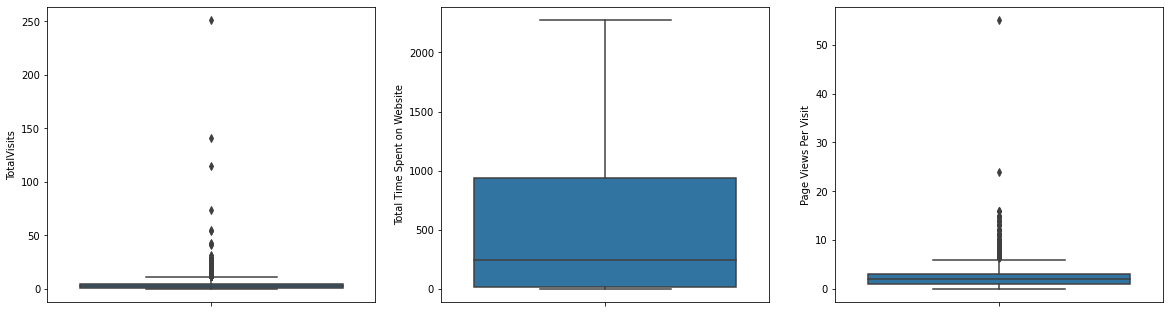

In [ ]:
# Check the outliers in all the numeric columns

plt.figure(figsize=(20, 25))
plt.subplot(4,3,1)
sns.boxplot(y = 'TotalVisits', data = lead_df)
plt.subplot(4,3,2)
sns.boxplot(y = 'Total Time Spent on Website', data = lead_df)
plt.subplot(4,3,3)
sns.boxplot(y = 'Page Views Per Visit', data = lead_df)
plt.show()

In [ ]:
# Removing values beyond 99% for Total Visits

nn_quartile_total_visits = lead_df['TotalVisits'].quantile(0.99)
lead_df = lead_df[lead_df["TotalVisits"] < nn_quartile_total_visits]
lead_df["TotalVisits"].describe(percentiles=[.25,.5,.75,.90,.95,.99])

count   9141.00
mean       3.18
std        2.91
min        0.00
25%        1.00
50%        3.00
75%        5.00
90%        7.00
95%        9.00
99%       13.00
max       16.00
Name: TotalVisits, dtype: float64

In [ ]:
# Checking outliers at 25%,50%,75%,90%,95% and above

lead_df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9141.00,9141.00,9141.00,9141.00
mean,0.39,3.18,486.07,2.33
std,0.49,2.91,547.86,2.05
min,0.00,0.00,0.00,0.00
25%,0.00,1.00,10.00,1.00
50%,0.00,3.00,247.00,2.00
75%,1.00,5.00,933.00,3.00
90%,1.00,7.00,1379.00,5.00
95%,1.00,9.00,1561.00,6.00
99%,1.00,13.00,1839.60,9.00


In [ ]:
# Removing values beyond 99% for page Views Per Visit

nn_quartile_page_visits = lead_df['Page Views Per Visit'].quantile(0.99)
lead_df = lead_df[lead_df["Page Views Per Visit"] < nn_quartile_page_visits]
lead_df["Page Views Per Visit"].describe(percentiles=[.25,.5,.75,.90,.95,.99])

count   9029.00
mean       2.23
std        1.82
min        0.00
25%        1.00
50%        2.00
75%        3.00
90%        5.00
95%        6.00
99%        7.00
max        8.00
Name: Page Views Per Visit, dtype: float64

In [ ]:
# Checking outliers at 25%,50%,75%,90%,95% and above
lead_df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9029.00,9029.00,9029.00,9029.00
mean,0.39,3.09,483.13,2.23
std,0.49,2.80,547.42,1.82
min,0.00,0.00,0.00,0.00
25%,0.00,1.00,7.00,1.00
50%,0.00,3.00,245.00,2.00
75%,1.00,4.00,929.00,3.00
90%,1.00,7.00,1378.00,5.00
95%,1.00,8.00,1558.00,6.00
99%,1.00,13.00,1839.72,7.00


In [ ]:
# Determine the percentage of data retained

num_data = round(100*(len(lead_df)/9240),2)
print(num_data)

97.72


At this point, the data has been cleaned and around 98% of data has been retained

# <span style="color:IndianRed ;">4. Data Analysis
Let us try and understand the data now based on each columns effect on the conversion rates

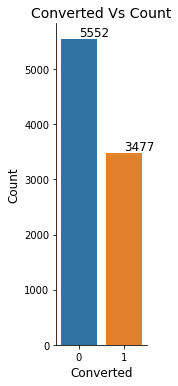

In [ ]:
# Conversion Rate 

plot = sns.catplot(x="Converted", kind="count", data=lead_df, aspect= 0.4);

plt.title('Converted Vs Count', fontsize = 14)
plt.xlabel("Converted", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, va='bottom')
    
plt.show()

From the above graph, there has been a overall conversion rate of around 39%

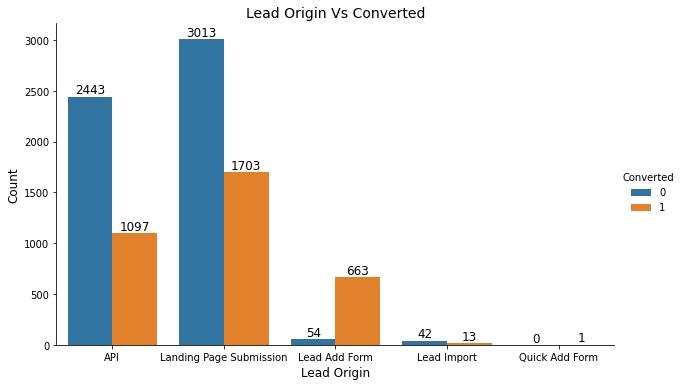

In [ ]:
# Lead Origin

plot = sns.catplot(x="Lead Origin", hue = "Converted", kind="count", data=lead_df, aspect= 1.7);

plt.title('Lead Origin Vs Converted', fontsize = 14)
plt.xlabel("Lead Origin", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, ha='center', va='bottom')
    
plt.show()

The maximum conversion is for Landing Page Submission, followed by API.
Also there was only one request from quick add form which got converted.

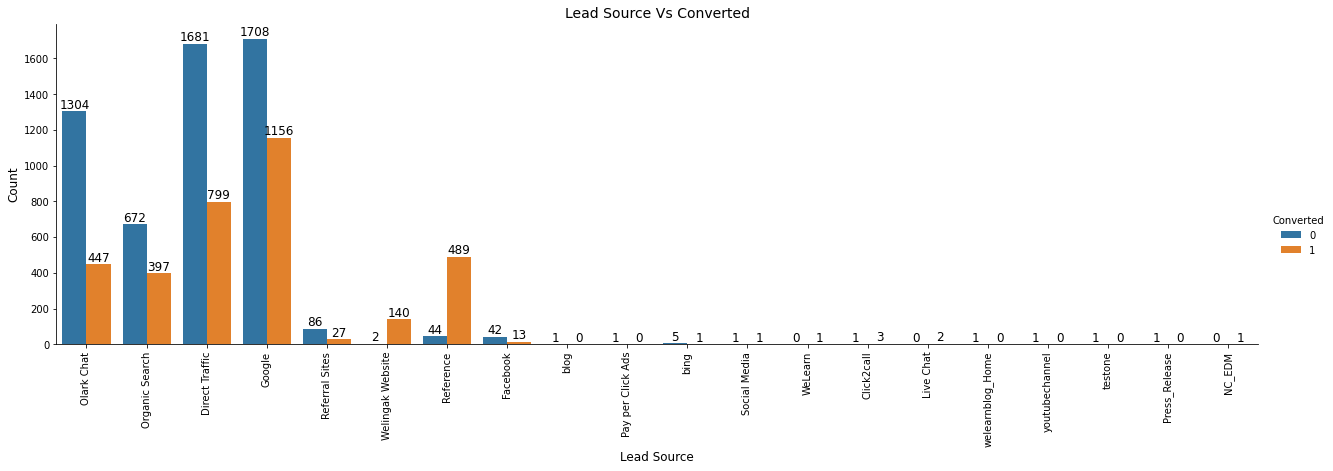

In [ ]:
# Lead Source

plot = sns.catplot(x="Lead Source", hue = "Converted", kind="count", data=lead_df, aspect = 3.5);

plt.title('Lead Source Vs Converted', fontsize = 14)
plt.xlabel("Lead Source", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.xticks(rotation=90)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, ha='center', va='bottom')
   
plt.show()

The major conversion in the lead source is from google, direct traffic, and Olarck Chat, ant they are well distributed.

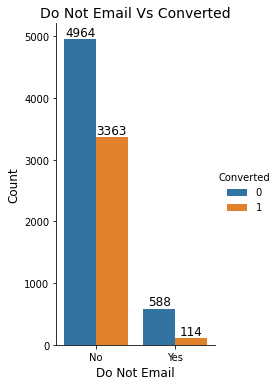

In [ ]:
# Do not Email

plot = sns.catplot(x="Do Not Email", hue = "Converted", kind="count", data=lead_df, aspect = 0.6);

plt.title('Do Not Email Vs Converted', fontsize = 14)
plt.xlabel("Do Not Email", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, ha='center', va='bottom')

plt.show()

Most of the conversion are from the customers who are marked with emails can be been sent

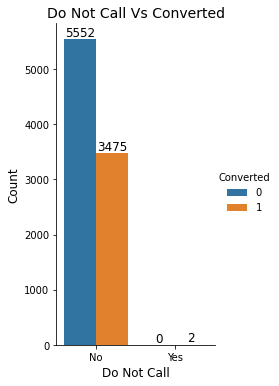

In [ ]:
# Do not Call

plot = sns.catplot(x="Do Not Call", hue = "Converted", kind="count", data=lead_df, aspect = 0.6);

plt.title('Do Not Call Vs Converted', fontsize = 14)
plt.xlabel("Do Not Call", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, ha='center', va='bottom')

plt.show()

The major conversions happened after calls were made.

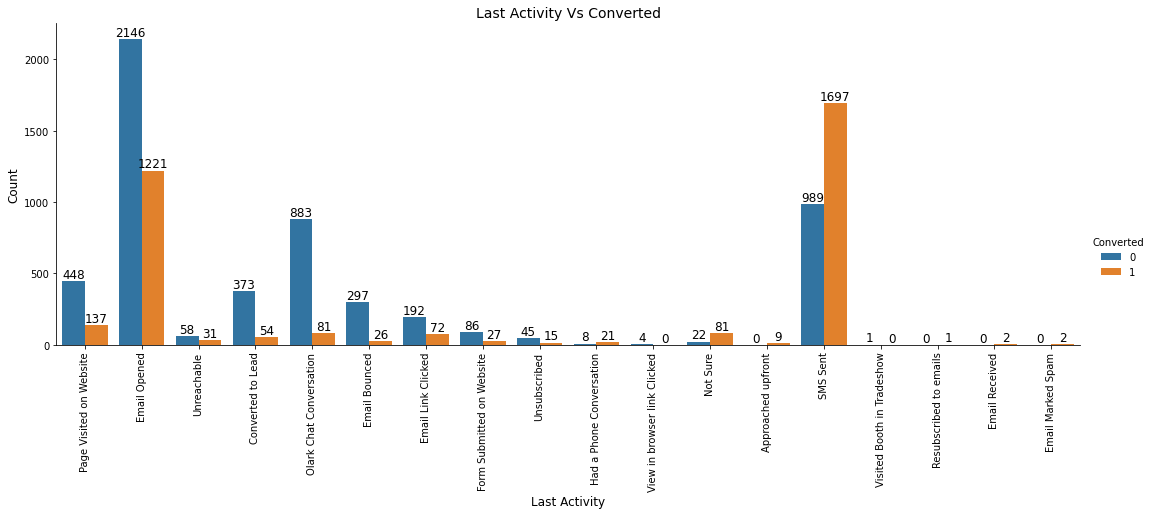

In [ ]:
# Last Activity

plot = sns.catplot(x="Last Activity", hue = "Converted", kind="count", data=lead_df, aspect = 3.0);

plt.title('Last Activity Vs Converted', fontsize = 14)
plt.xlabel("Last Activity", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.xticks(rotation=90)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, ha='center', va='bottom')

plt.show()

The last activity value of SMS Sent, and email opened  had a major conversion.

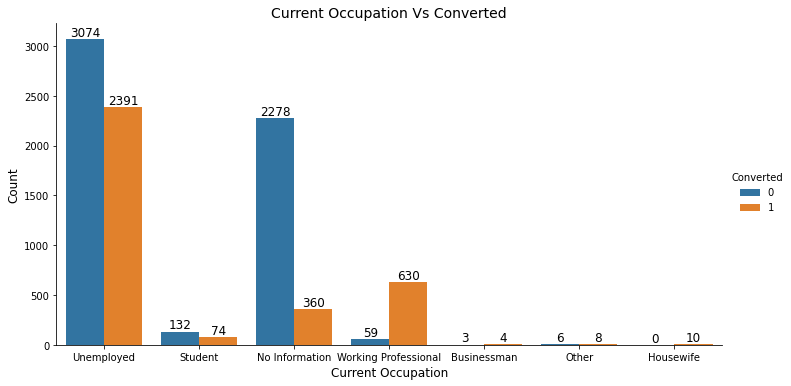

In [ ]:
# What is your current occupation

plot = sns.catplot(x="What is your current occupation", hue = "Converted", kind="count", data=lead_df, 
                   aspect = 2.0);

plt.title('Current Occupation Vs Converted', fontsize = 14)
plt.xlabel("Current Occupation", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, ha='center', va='bottom')

plt.show()

Unemployed and persons with missing current occupation data were among the major conversion

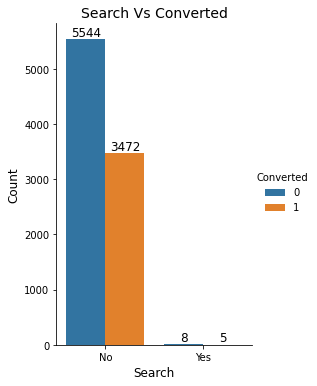

In [ ]:
# Search

plot = sns.catplot(x="Search", hue = "Converted", kind="count", data=lead_df, aspect = 0.7);

plt.title('Search Vs Converted', fontsize = 14)
plt.xlabel("Search", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, ha='center', va='bottom')

plt.show()

Conversion rate is high on leads who are not through search.

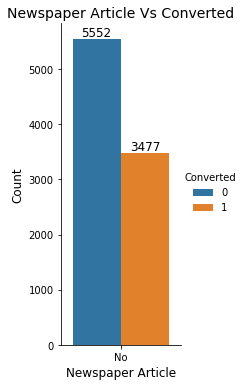

In [ ]:
# Newspaper Article

plot = sns.catplot(x="Newspaper Article", hue = "Converted", kind="count", data=lead_df, aspect = 0.5);

plt.title('Newspaper Article Vs Converted', fontsize = 14)
plt.xlabel("Newspaper Article", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, ha='center', va='bottom')

plt.show()

Since "Newspaper Article" column now has only one value for all rows - "No" , it is safe to drop this column

In [ ]:
# Dropping Newspaper Article

lead_df = lead_df.drop(['Newspaper Article'], axis=1)

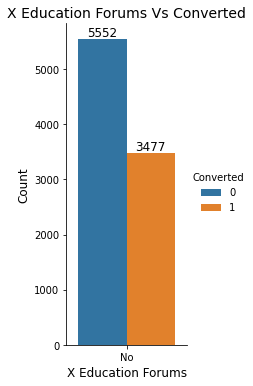

In [ ]:
# X Education Forums

plot = sns.catplot(x="X Education Forums", hue = "Converted", kind="count", data=lead_df, aspect = 0.5);

plt.title('X Education Forums Vs Converted', fontsize = 14)
plt.xlabel("X Education Forums", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, ha='center', va='bottom')

plt.show()

Since "X Education Forums" column now has only one value for all rows - "No" , it is safe to drop this column

In [ ]:
# Dropping X Education Forum column

lead_df = lead_df.drop(['X Education Forums'], axis=1)

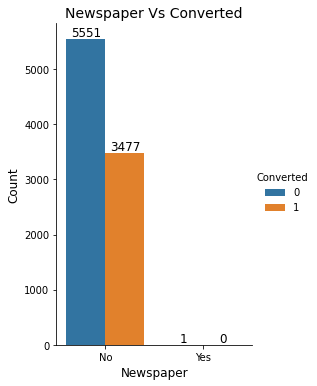

In [ ]:
plot = sns.catplot(x="Newspaper", hue = "Converted", kind="count", data=lead_df, aspect = 0.7);

plt.title('Newspaper Vs Converted', fontsize = 14)
plt.xlabel("Newspaper", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, ha='center', va='bottom')

plt.show()

Since Newspaper column has only one row with "Yes" as the value and further since this lead did not get converted and rest of all the values are "No", we can safely drop the column

In [ ]:
# Dropping Newspaper column

lead_df = lead_df.drop(['Newspaper'], axis=1)

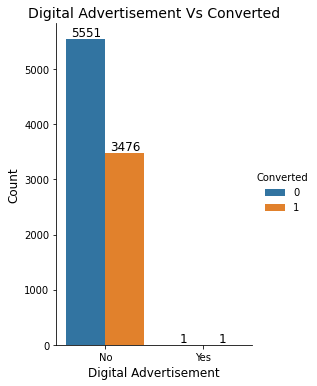

In [ ]:
# Digital Advertisement

plot = sns.catplot(x="Digital Advertisement", hue = "Converted", kind="count", data=lead_df, aspect = 0.7);

plt.title('Digital Advertisement Vs Converted', fontsize = 14)
plt.xlabel("Digital Advertisement", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, ha='center', va='bottom')

plt.show()

It can be noticed above that there were 2 leads that came from digital advertisement of which one lead got converted

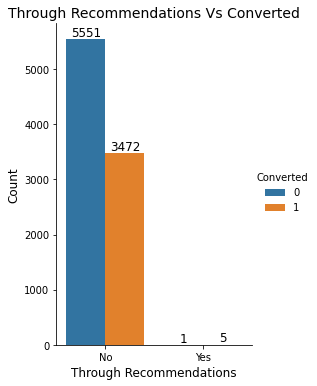

In [ ]:
# Through Recommendations

plot = sns.catplot(x="Through Recommendations", hue = "Converted", kind="count", data=lead_df, aspect = 0.7);

plt.title('Through Recommendations Vs Converted', fontsize = 14)
plt.xlabel("Through Recommendations", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, ha='center', va='bottom')

plt.show()

It can be seen that a total of 6 leads came through recommendations of which 5 leads got converted

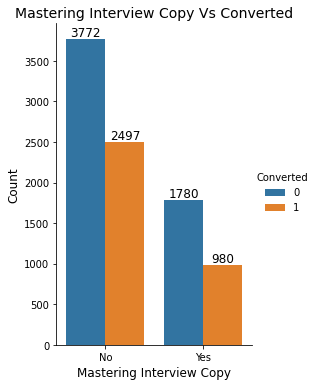

In [ ]:
# A free copy of Mastering The Interview

plot = sns.catplot(x="A free copy of Mastering The Interview", hue = "Converted", kind="count", data=lead_df,
                   aspect = 0.7);

plt.title('Mastering Interview Copy Vs Converted', fontsize = 14)
plt.xlabel("Mastering Interview Copy", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, ha='center', va='bottom')

plt.show()

Conversion rate is high on leads who do not want a free copy of Mastering Interviews

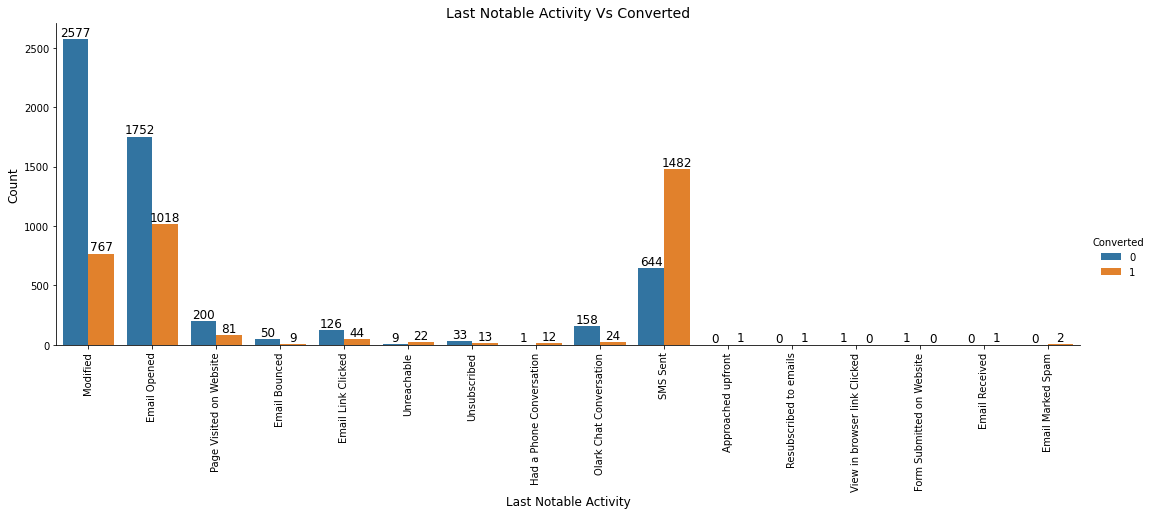

In [ ]:
# Last Notable Activity

plot = sns.catplot(x="Last Notable Activity", hue = "Converted", kind="count", data=lead_df, aspect = 3.0);

plt.title('Last Notable Activity Vs Converted', fontsize = 14)
plt.xlabel("Last Notable Activity", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.xticks(rotation=90)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, ha='center', va='bottom')

plt.show()

It can be noticed that the conversion rate is high for "SMS Sent"

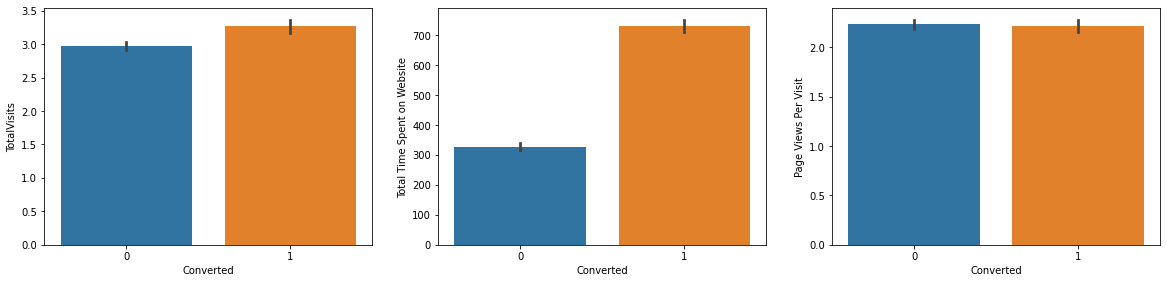

In [ ]:
# Now check the conversions for all numeric values

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'TotalVisits', x='Converted', data = lead_df)
plt.subplot(4,3,2)
sns.barplot(y = 'Total Time Spent on Website', x='Converted', data = lead_df)
plt.subplot(4,3,3)
sns.barplot(y = 'Page Views Per Visit', x='Converted', data = lead_df)
plt.show()

The conversion rated were high for Total Visits, Total Time Spent on Website and Page Views Per Visit

# <span style="color:IndianRed ;">5. Data Preparation - Creating Dummies

Converting some binary variables (Yes/No) to 0/1

In [ ]:
variablelist = ['Do Not Email', 'Do Not Call', 'Search', 'Digital Advertisement', 'Through Recommendations','A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the columns
lead_df[variablelist] = lead_df[variablelist].apply(binary_map)

###Create Dummy for applicable categorical columns

In [ ]:
# Create a dataset with all the variables which needs dummy data creation
lead_dummy=lead_df[['Lead Source','Last Activity','Last Notable Activity','Lead Origin','What is your current occupation']]


In [ ]:
# Create dummies
dummy=pd.get_dummies(lead_dummy, drop_first=True)

In [ ]:
# Verify
dummy.head()

,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Not Sure,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,What is your current occupation_Housewife,What is your current occupation_No Information,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [ ]:
# concat the lead data with the dummy dataset
lead_df=pd.concat([dummy, lead_df],axis=1)

###Drop the dummyfied columns


In [ ]:
#Drop the columns for which we have already created dummy variables
lead_df.drop(['Lead Source','Last Activity','Last Notable Activity','Lead Origin','What is your current occupation'],axis=1,inplace=True)

###Finalised Dataset

In [ ]:
#Verify the Finalised Dataset
lead_df.head()

,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Not Sure,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,What is your current occupation_Housewife,What is your current occupation_No Information,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.00,0,0.00,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,5.00,674,2.50,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,2.00,1532,2.00,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1.00,305,1.00,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,2.00,1428,1.00,0,0,0,0


In [ ]:
lead_df.shape

(9029, 71)

# <span style="color:IndianRed ;">6. Correlation Check
Assessing the model with StatsModels

In [ ]:
lead_df.corr()

,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Not Sure,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,What is your current occupation_Housewife,What is your current occupation_No Information,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview
Lead Source_Direct Traffic,1.00,-0.05,-0.42,-0.01,-0.01,-0.30,-0.23,-0.01,-0.01,-0.15,-0.07,-0.01,-0.01,-0.08,-0.02,-0.01,-0.01,-0.01,-0.01,0.06,0.08,-0.01,0.01,0.02,-0.01,-0.01,-0.02,-0.07,-0.17,0.06,-0.01,0.02,-0.01,0.01,-0.00,-0.01,0.02,0.01,0.01,0.03,-0.01,0.02,-0.01,-0.05,-0.07,0.05,-0.01,0.02,-0.01,0.00,-0.01,0.54,-0.18,-0.05,-0.01,-0.01,-0.05,0.01,0.03,0.04,-0.01,0.10,-0.01,-0.08,0.13,0.14,0.17,0.02,0.02,0.01,0.61
Lead Source_Facebook,-0.05,1.00,-0.05,-0.00,-0.00,-0.04,-0.03,-0.00,-0.00,-0.02,-0.01,-0.00,-0.00,-0.01,-0.00,-0.00,-0.00,-0.00,-0.00,-0.02,0.00,-0.01,-0.00,0.01,-0.00,-0.01,-0.00,0.21,-0.03,-0.02,-0.00,-0.01,-0.01,-0.01,-0.00,-0.00,-0.01,-0.01,-0.00,0.01,-0.00,-0.00,-0.00,0.04,-0.01,-0.01,-0.00,-0.04,-0.00,-0.01,-0.00,-0.08,-0.02,0.98,-0.00,-0.00,-0.02,-0.00,-0.00,0.03,-0.01,-0.02,-0.00,-0.02,-0.04,-0.03,-0.05,-0.00,-0.00,-0.00,-0.05
Lead Source_Google,-0.42,-0.05,1.00,-0.01,-0.01,-0.33,-0.25,-0.01,-0.01,-0.17,-0.08,-0.01,-0.01,-0.09,-0.02,-0.01,-0.01,-0.01,-0.01,0.03,-0.05,-0.02,-0.01,0.03,0.02,0.06,0.01,-0.07,-0.09,0.02,-0.01,0.02,0.03,-0.00,0.01,0.02,-0.00,-0.04,-0.01,0.03,0.02,-0.01,0.03,-0.02,-0.03,0.01,-0.01,0.01,0.01,0.00,0.02,0.09,-0.17,-0.05,0.02,-0.00,-0.01,-0.00,-0.03,0.03,-0.02,-0.06,0.01,0.03,0.22,0.21,0.26,-0.03,-0.01,-0.01,-0.32
Lead Source_Live Chat,-0.01,-0.00,-0.01,1.00,-0.00,-0.01,-0.01,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.01,-0.00,-0.00,-0.00,-0.00,-0.01,-0.00,-0.00,0.02,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.01,-0.00,-0.00,-0.00,-0.01,-0.00,-0.00,-0.00,0.03,-0.00,-0.00,-0.00,-0.02,0.05,-0.00,-0.00,-0.00,-0.01,-0.00,-0.00,0.01,-0.00,-0.00,-0.00,0.02,-0.02,-0.01,-0.02,-0.00,-0.00,-0.00,-0.01
Lead Source_NC_EDM,-0.01,-0.00,-0.01,-0.00,1.00,-0.01,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.

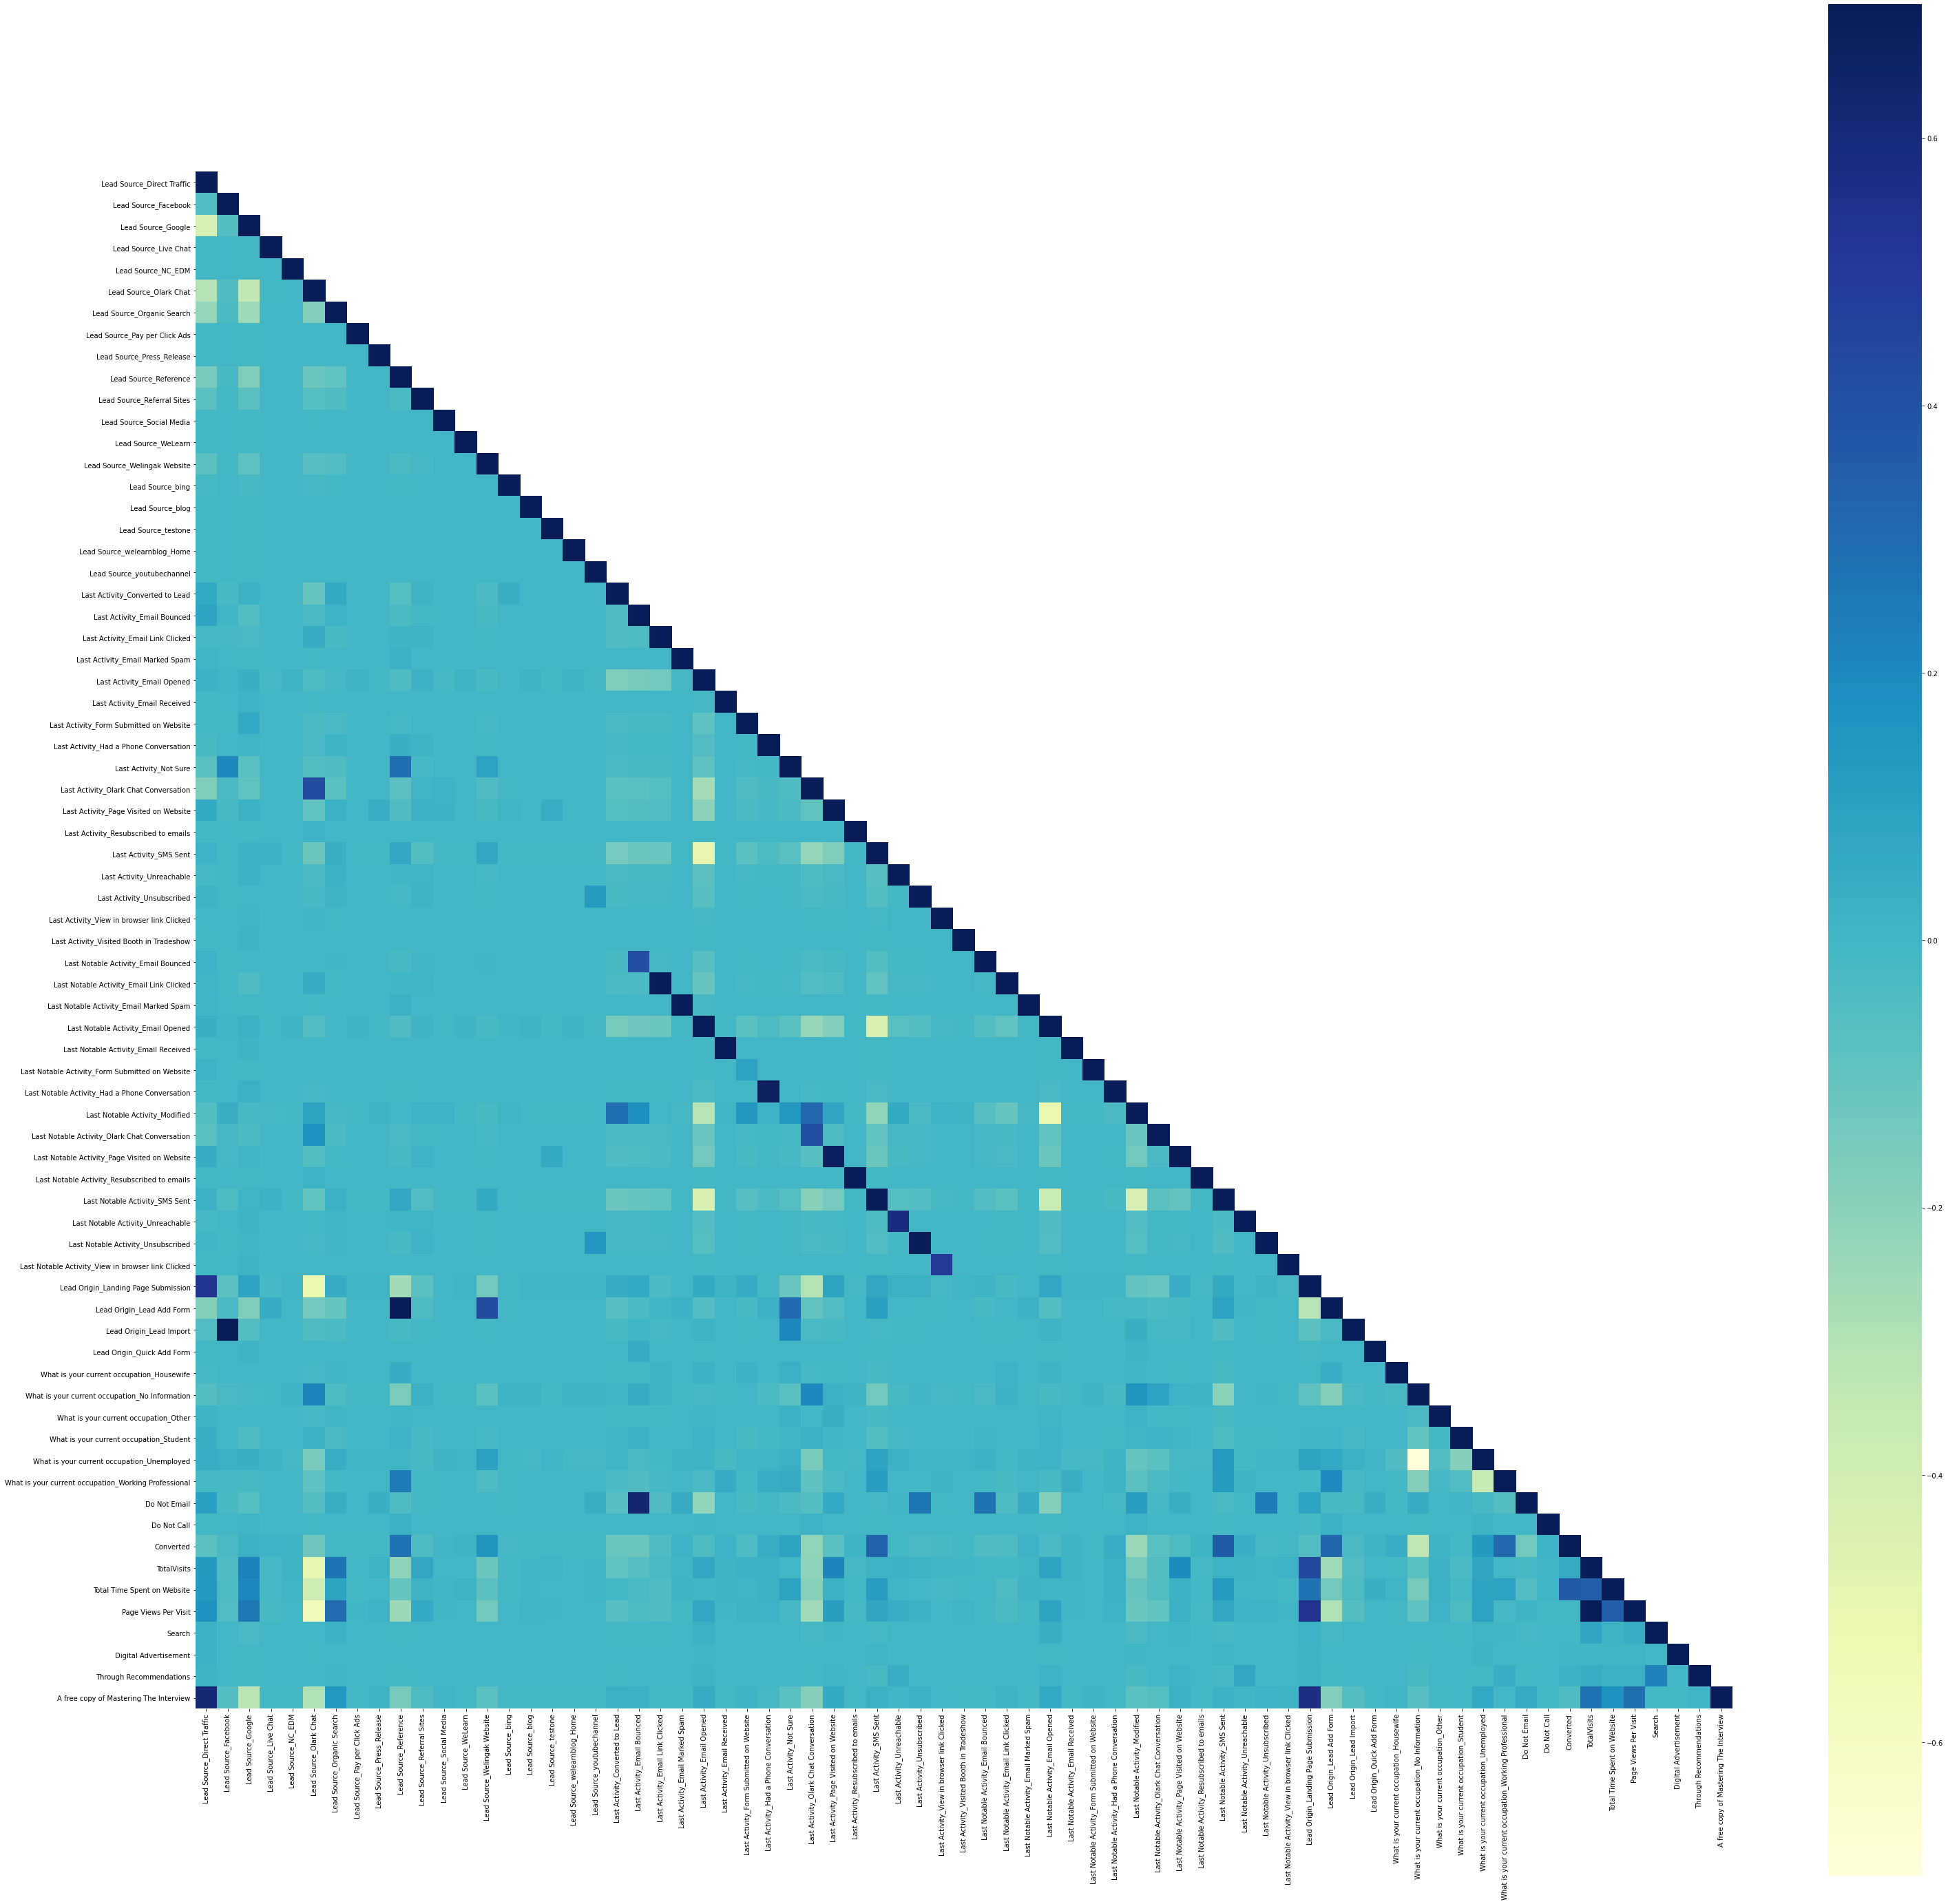

In [ ]:
#plotting the heatmap to identify the correlation
plt.figure(figsize=(50,50))


mask = np.array(lead_df.corr())
mask[np.tril_indices_from(mask)] = False
sns.heatmap(lead_df.corr(), mask=mask, vmax=.7,vmin=-.7, square=True, cmap = "YlGnBu");  #removed annot=True for bettter view


**INSIGHTS**:
- Following are the pairs having a little high correlation:
    - Lead_Source_Reference and Lead_Origin_Lead_Add_Form
    - Last_Activity_Email_Link_Clicked and Last_Notable_Activity_Email_Link_Clicked
    - Last_Activity_Email opened and Last_Notable_Activity_Email opened
    - Last_Activity_Had a phone conversation and Last_Notable_Activity_Had a phone conversation
    - Last_Activity_Sms sent and Last_Notable_Activity_Email_Sms sent
    - Last_Activity_Unsubscribed and Last_Notable_Activity_Unsubscribed
    - Occupation_Unemployed and Occupation_Other
- This can be handled during Recursive Function Elimination and while building the model.


# <span style="color:IndianRed ;">7. Test-Train Split


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Putting feature variable to X

X = lead_df.drop(['Converted'], axis=1)
X.head()

,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Not Sure,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,What is your current occupation_Housewife,What is your current occupation_No Information,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.00,0,0.00,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,5.00,674,2.50,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,2.00,1532,2.00,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1.00,305,1.00,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,2.00,1428,1.00,0,0,0,0


In [ ]:
# Putting response variable to y

y = lead_df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [ ]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

# <span style="color:IndianRed ;">8. Rescaling the features with MinMax Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits', 'Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Not Sure,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,What is your current occupation_Housewife,What is your current occupation_No Information,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview
2240,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0.19,0.90,0.38,0,0,0,0
113,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.31,0.71,0.62,0,0,0,0
4132,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0.38,0.77,0.75,0,0,0,1
5573,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0.12,0.03,0.25,0,0,0,1
1109,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.06,0.01,0.12,0,0,0,0


In [ ]:
### Checking the Conversion Rate percentage

converted = (sum(lead_df['Converted'])/len(lead_df['Converted'].index))*100
converted

38.50924797873519

#### We have almost 39% conversion rate

# <span style="color:IndianRed ;">9. Model Building
Assessing the model with StatsModels

#### First Model

In [ ]:
import statsmodels.api as sm

In [ ]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6259
Model Family:                Binomial   Df Model:                           60
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 12 Sep 2021   Deviance:                          nan
Time:                        05:11:07   Pearson chi2:                 7.82e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                 3.933e+15   6.14e+07    6.4e+07      0.000    3.93e+15    3.93e+15
Lead Source_Direct Traffic                           -3.878e+15   4.94e+07  -7.85e+07      0.000   -3.88e+15   -3.88e+15
Lead Source_Facebook                                 -3.478e+15   6.87e+07  -5.06e+07      0.000   -3.48e+15   -3.48e+15
Lead Source_Google                                   -3.648e+15   4.93e+07   -7.4e+07      0.000   -3.65e+15   -3.65e+15
Lead Source_Live Chat                                 6.183e+14   6.72e+07    9.2e+06      0.000    6.18e+14    6.18e+14
Lead Source_NC_EDM                                      21.0619   2.65e-07   7.96e+07      0.000      21.062      21.062
Lead Source_Olark Chat                               -4.087e+15   4.95e+07  -8.26e+07      0.000   -4.09e+15   -4.09e+15
Lead Source_Organic Search                           -3.736e+15   4.94e+07  -7.56e+07      0.000   -3.74e+15   -3.74e+15
Lead Source_Pay per Click Ads                            6.0611   1.95e-07    3.1e+07      0.000       6.061       6.061
Lead Source_Press_Release                               29.9982      2e-07    1.5e+08      0.000      29.998      29.998
Lead Source_Reference                                -3.734e+15   4.77e+07  -7.82e+07      0.000   -3.73e+15   -3.73e+15
Lead Source_Referral Sites                            -3.83e+15   4.99e+07  -7.68e+07      0.000   -3.83e+15   -3.83e+15
Lead Source_Social Media                              -7.71e+15   8.35e+07  -9.23e+07      0.000   -7.71e+15   -7.71e+15
Lead Source_WeLearn                                     -5.2341   8.78e-08  -5.96e+07      0.000      -5.234      -5.234
Lead Source_Welingak Website                         -3.882e+15    4.8e+07  -8.09e+07      0.000   -3.88e+15   -3.88e+15
Lead Source_bing                                      -6.13e+15   5.78e+07  -1.06e+08      0.000   -6.13e+15   -6.13e+15
Lead Source_blog                                     -5.973e+15   8.33e+07  -7.17e+07      0.000   -5.97e+15   -5.97e+15
Lead Source_testone                                  -6.499e+15   8.35e+07  -7.79e+07      0.000    -6.5e+15    -6.5e+15
Lead Source_welearnblog_Home                         -9.153e+15   8.33e+07   -1.1e+08      0.000   -9.15e+15   -9.15e+15
Lead Source_youtubechannel                              20.0724   2.49e-07   8.06e+07      0.000      20.072      20.072
Last Activity_Converted to Lead                      -2.703e+15   2.78e+07  -9.72e+07      0.000    -2.7e+15    -2.7e+15
Last Activity_Email Bounced                          -2.806e+15   2.82e+07  -9.95e+07      0.000   -2.81e+15   -2.81e+15
Last Activity_Email Link Clicked                     -2.77

##Feature Selection Using RFE

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [ ]:
from sklearn.feature_selection import RFE

# running RFE with 20 variables as output

rfe = RFE(logreg, 20)            
rfe = rfe.fit(X_train, y_train)

In [ ]:
rfe.support_

array([False, False, False, False, False,  True, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False,  True,  True, False, False, False, False, False, False,
        True,  True, False, False, False,  True, False, False, False,
        True, False, False, False, False, False,  True, False, False,
       False, False,  True,  True, False, False, False,  True, False,
       False,  True,  True, False, False, False,  True,  True, False,
        True,  True,  True,  True, False, False, False])

In [ ]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Lead Source_Direct Traffic', False, 11),
 ('Lead Source_Facebook', False, 25),
 ('Lead Source_Google', False, 24),
 ('Lead Source_Live Chat', False, 32),
 ('Lead Source_NC_EDM', False, 48),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 23),
 ('Lead Source_Pay per Click Ads', False, 47),
 ('Lead Source_Press_Release', False, 45),
 ('Lead Source_Reference', False, 4),
 ('Lead Source_Referral Sites', False, 22),
 ('Lead Source_Social Media', False, 37),
 ('Lead Source_WeLearn', False, 44),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 15),
 ('Lead Source_blog', False, 29),
 ('Lead Source_testone', False, 27),
 ('Lead Source_welearnblog_Home', False, 33),
 ('Lead Source_youtubechannel', False, 49),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 39),
 ('Last Activity_Email Marked Spam', False, 10),
 ('Last Activity_Email Opened', False, 21),
 (

In [ ]:
# variables shortlisted by RFE

col = X_train.columns[rfe.support_]
col

Index(['Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Not Sure', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Unreachable', 'Last Notable Activity_Email Bounced',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable',
       'Lead Origin_Lead Add Form',
       'What is your current occupation_Housewife',
       'What is your current occupation_No Information',
       'What is your current occupation_Working Professional', 'Do Not Email',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Search'],
      dtype='object')

## Rebuilding Model - Model 2

In [ ]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6299
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2510.8
Date:                Sun, 12 Sep 2021   Deviance:                       5021.5
Time:                        05:11:15   Pearson chi2:                 6.58e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.1664      0.117    -18.487      0.000      -2.396      -1.937
Lead Source_Olark Chat                                   1.4476      0.136     10.678      0.000       1.182       1.713
Lead Source_Welingak Website                             2.1220      0.742      2.858      0.004       0.667       3.577
Last Activity_Converted to Lead                         -1.0564      0.217     -4.859      0.000      -1.483      -0.630
Last Activity_Email Bounced                             -1.7352      0.493     -3.520      0.000      -2.701      -0.769
Last Activity_Not Sure                                  -1.6002      0.468     -3.416      0.001      -2.518      -0.682
Last Activity_Olark Chat Conversation                   -1.3959      0.168     -8.304      0.000      -1.725      -1.066
Last Activity_Unreachable                               -1.2832      0.574     -2.236      0.025      -2.408      -0.158
Last Notable Activity_Email Bounced                      1.5310      0.673      2.274      0.023       0.211       2.851
Last Notable Activity_Had a Phone Conversation           3.1723      1.165      2.722      0.006       0.888       5.456
Last Notable Activity_SMS Sent                           1.4443      0.083     17.483      0.000       1.282       1.606
Last Notable Activity_Unreachable                        2.9245      0.790      3.703      0.000       1.377       4.472
Lead Origin_Lead Add Form                                3.7370      0.221     16.899      0.000       3.304       4.170
What is your current occupation_Housewife               22.8237   1.49e+04      0.002      0.999   -2.92e+04    2.93e+04
What is your current occupation_No Information          -1.1803      0.090    -13.118      0.000      -1.357      -1.004
What is your current occupation_Working Professional     2.6293      0.202     13.001      0.000       2.233       3.026
Do Not Email                                            -1.1102      0.194     -5.720      0.000      -1.491      -0.730
TotalVisits                                              1.6158      0.286      5.654      0.000       1.056       2.176
Total Time Spent on Website                              4.5143      0.168     26.817      0.000       4.184       4.844
Page Views Per Visit                                    -0.7964      0.250     -3.188      0.001      -1.286      -0.307
Search                                                  -1.4589      0.997     -1.463      0.143      -3.414       0.496
========================================================================================================================
"""

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
18,Page Views Per Visit,5.14
16,TotalVisits,4.70
17,Total Time Spent on Website,2.10
3,Last Activity_Email Bounced,1.97
15,Do Not Email,1.82
0,Lead Source_Olark Chat,1.61
11,Lead Origin_Lead Add Form,1.57
6,Last Activity_Unreachable,1.54
10,Last Notable Activity_Unreachable,1.53
13,What is your current occupation_No Information,1.52


In [ ]:
#drop the most insignificant variable
col = col.drop('What is your current occupation_Housewife',1)


## Rebuilding Model - Model 3

In [ ]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6300
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2516.8
Date:                Sun, 12 Sep 2021   Deviance:                       5033.5
Time:                        05:11:15   Pearson chi2:                 6.59e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.1500      0.117    -18.397      0.000      -2.379      -1.921
Lead Source_Olark Chat                                   1.4358      0.135     10.608      0.000       1.171       1.701
Lead Source_Welingak Website                             2.1042      0.742      2.835      0.005       0.649       3.559
Last Activity_Converted to Lead                         -1.0665      0.217     -4.908      0.000      -1.492      -0.641
Last Activity_Email Bounced                             -1.7418      0.493     -3.533      0.000      -2.708      -0.775
Last Activity_Not Sure                                  -1.5724      0.465     -3.383      0.001      -2.483      -0.662
Last Activity_Olark Chat Conversation                   -1.3998      0.168     -8.329      0.000      -1.729      -1.070
Last Activity_Unreachable                               -1.2911      0.574     -2.249      0.024      -2.416      -0.166
Last Notable Activity_Email Bounced                      1.5347      0.673      2.279      0.023       0.215       2.855
Last Notable Activity_Had a Phone Conversation           3.1658      1.165      2.717      0.007       0.882       5.450
Last Notable Activity_SMS Sent                           1.4369      0.083     17.410      0.000       1.275       1.599
Last Notable Activity_Unreachable                        2.9273      0.790      3.706      0.000       1.379       4.475
Lead Origin_Lead Add Form                                3.7377      0.221     16.925      0.000       3.305       4.171
What is your current occupation_No Information          -1.1852      0.090    -13.180      0.000      -1.361      -1.009
What is your current occupation_Working Professional     2.6226      0.202     12.970      0.000       2.226       3.019
Do Not Email                                            -1.1139      0.194     -5.740      0.000      -1.494      -0.734
TotalVisits                                              1.6043      0.286      5.619      0.000       1.045       2.164
Total Time Spent on Website                              4.5101      0.168     26.818      0.000       4.181       4.840
Page Views Per Visit                                    -0.8046      0.250     -3.223      0.001      -1.294      -0.315
Search                                                  -1.4580      0.996     -1.464      0.143      -3.410       0.494
========================================================================================================================
"""

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
17,Page Views Per Visit,5.14
15,TotalVisits,4.70
16,Total Time Spent on Website,2.10
3,Last Activity_Email Bounced,1.97
14,Do Not Email,1.82
0,Lead Source_Olark Chat,1.61
11,Lead Origin_Lead Add Form,1.56
6,Last Activity_Unreachable,1.54
10,Last Notable Activity_Unreachable,1.53
12,What is your current occupation_No Information,1.52


In [ ]:
#drop the most insignificant variable
col = col.drop('Search',1)

## Rebuilding Model - Model 4

In [ ]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6301
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2517.9
Date:                Sun, 12 Sep 2021   Deviance:                       5035.9
Time:                        05:11:16   Pearson chi2:                 6.58e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.1420      0.117    -18.352      0.000      -2.371      -1.913
Lead Source_Olark Chat                                   1.4264      0.135     10.545      0.000       1.161       1.691
Lead Source_Welingak Website                             2.1035      0.742      2.834      0.005       0.649       3.558
Last Activity_Converted to Lead                         -1.0681      0.217     -4.917      0.000      -1.494      -0.642
Last Activity_Email Bounced                             -1.7421      0.493     -3.537      0.000      -2.708      -0.777
Last Activity_Not Sure                                  -1.5662      0.464     -3.372      0.001      -2.476      -0.656
Last Activity_Olark Chat Conversation                   -1.3979      0.168     -8.321      0.000      -1.727      -1.069
Last Activity_Unreachable                               -1.2879      0.574     -2.244      0.025      -2.413      -0.163
Last Notable Activity_Email Bounced                      1.5351      0.673      2.281      0.023       0.216       2.854
Last Notable Activity_Had a Phone Conversation           3.1705      1.165      2.722      0.006       0.888       5.453
Last Notable Activity_SMS Sent                           1.4376      0.082     17.426      0.000       1.276       1.599
Last Notable Activity_Unreachable                        2.9269      0.790      3.706      0.000       1.379       4.475
Lead Origin_Lead Add Form                                3.7302      0.221     16.897      0.000       3.297       4.163
What is your current occupation_No Information          -1.1827      0.090    -13.158      0.000      -1.359      -1.006
What is your current occupation_Working Professional     2.6206      0.202     12.958      0.000       2.224       3.017
Do Not Email                                            -1.1115      0.194     -5.728      0.000      -1.492      -0.731
TotalVisits                                              1.5785      0.285      5.537      0.000       1.020       2.137
Total Time Spent on Website                              4.5073      0.168     26.809      0.000       4.178       4.837
Page Views Per Visit                                    -0.8136      0.249     -3.261      0.001      -1.302      -0.325
========================================================================================================================
"""

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
17,Page Views Per Visit,5.14
15,TotalVisits,4.69
16,Total Time Spent on Website,2.10
3,Last Activity_Email Bounced,1.97
14,Do Not Email,1.82
0,Lead Source_Olark Chat,1.60
11,Lead Origin_Lead Add Form,1.56
6,Last Activity_Unreachable,1.54
10,Last Notable Activity_Unreachable,1.53
12,What is your current occupation_No Information,1.52


In [ ]:
#drop the most insignificant variable
col = col.drop('Page Views Per Visit',1)

## Rebuilding Model - Model 5

In [ ]:
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6302
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2523.3
Date:                Sun, 12 Sep 2021   Deviance:                       5046.6
Time:                        05:11:16   Pearson chi2:                 6.65e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.3285      0.103    -22.649      0.000      -2.530      -2.127
Lead Source_Olark Chat                                   1.6047      0.125     12.883      0.000       1.361       1.849
Lead Source_Welingak Website                             2.1083      0.742      2.841      0.005       0.654       3.563
Last Activity_Converted to Lead                         -1.0098      0.217     -4.657      0.000      -1.435      -0.585
Last Activity_Email Bounced                             -1.7336      0.497     -3.486      0.000      -2.708      -0.759
Last Activity_Not Sure                                  -1.6376      0.470     -3.483      0.000      -2.559      -0.716
Last Activity_Olark Chat Conversation                   -1.3770      0.168     -8.218      0.000      -1.705      -1.049
Last Activity_Unreachable                               -1.3233      0.574     -2.306      0.021      -2.448      -0.199
Last Notable Activity_Email Bounced                      1.5520      0.675      2.299      0.022       0.229       2.875
Last Notable Activity_Had a Phone Conversation           3.1412      1.163      2.701      0.007       0.862       5.420
Last Notable Activity_SMS Sent                           1.4214      0.082     17.299      0.000       1.260       1.582
Last Notable Activity_Unreachable                        2.9258      0.793      3.688      0.000       1.371       4.480
Lead Origin_Lead Add Form                                3.9068      0.214     18.232      0.000       3.487       4.327
What is your current occupation_No Information          -1.1730      0.090    -13.087      0.000      -1.349      -0.997
What is your current occupation_Working Professional     2.6202      0.202     12.950      0.000       2.224       3.017
Do Not Email                                            -1.1197      0.194     -5.779      0.000      -1.499      -0.740
TotalVisits                                              1.1203      0.248      4.509      0.000       0.633       1.607
Total Time Spent on Website                              4.5047      0.168     26.797      0.000       4.175       4.834
========================================================================================================================
"""

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,TotalVisits,2.05
16,Total Time Spent on Website,2.00
3,Last Activity_Email Bounced,1.97
14,Do Not Email,1.82
0,Lead Source_Olark Chat,1.59
11,Lead Origin_Lead Add Form,1.56
6,Last Activity_Unreachable,1.54
10,Last Notable Activity_Unreachable,1.53
12,What is your current occupation_No Information,1.50
5,Last Activity_Olark Chat Conversation,1.44


#####Insight:
This Model looks stable with significant p-values and below 5 VIF.

##Preparing the Model for prediction based on Model

In [ ]:
# Getting the predicted values on the train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

2240   0.68
113    0.55
4132   0.83
5573   0.11
1109   0.01
2282   0.04
2976   0.77
8431   0.48
2770   0.83
5790   1.00
dtype: float64

In [ ]:
# Reshape

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.68093212, 0.54827972, 0.82518231, 0.11319969, 0.01212098,
       0.04254333, 0.77410657, 0.47578737, 0.82895781, 0.99638769])

##### Creating a dataframe with the actual converted flag and the predicted probabilities

In [ ]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['LeadId'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId
0,0,0.68,2240
1,0,0.55,113
2,1,0.83,4132
3,0,0.11,5573
4,0,0.01,1109


##### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [ ]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted
0,0,0.68,2240,1
1,0,0.55,113,1
2,1,0.83,4132,1
3,0,0.11,5573,0
4,0,0.01,1109,0


## Confusion metrics and Other Parameters
Lets check the confusion metrics and accuracy

In [ ]:
from sklearn import metrics

In [ ]:
# Confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3395  463]
 [ 701 1761]]


In [ ]:
# Predicted     not_converted    converted
# Actual
# not_converted        3397      461
# converted            725       1737

In [ ]:
# Let's check the overall accuracy.

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8158227848101266


Accuracy rate is around 81% which is good. However we will also need to calculate the other metrics as we cannot depend only 
on the accuracy metrics

##### Predictive Values Metrices

Let's work on finding the Predictive Metrices like Sensitivity, Specificity, False Positive Rate, Postitive Predictive Value and Negative Predictive Values

In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model

TP / float(TP+FN)

0.715272136474411

In [ ]:
# Let us calculate specificity

TN / float(TN+FP)

0.8799896319336443

In [ ]:
# Calculate false postive rate - predicting non conversion when leads have converted

print(FP/ float(TN+FP))

0.12001036806635562


In [ ]:
# positive predictive value 

print (TP / float(TP+FP))

0.79181654676259


In [ ]:
# Negative predictive value

print (TN / float(TN+ FN))

0.828857421875


# <span style="color:IndianRed ;">10. ROC Curve

Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [ ]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, 
                                         drop_intermediate = False )

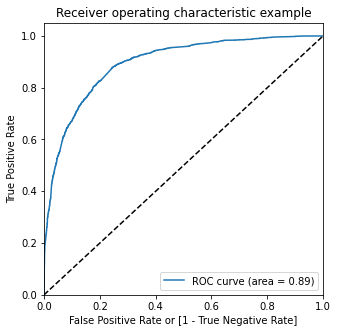

In [ ]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

# <span style="color:IndianRed ;">11. Model Evalauation


###Finding Optimal Cutoff Point

Optimal cut off probability is that prob where we get balanced sensitivity and specificity

In [ ]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.68,2240,1,1,1,1,1,1,1,1,0,0,0
1,0,0.55,113,1,1,1,1,1,1,1,0,0,0,0
2,1,0.83,4132,1,1,1,1,1,1,1,1,1,1,0
3,0,0.11,5573,0,1,1,0,0,0,0,0,0,0,0
4,0,0.01,1109,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

      prob  accuracy  sensi  speci
0.00  0.00      0.39   1.00   0.00
0.10  0.10      0.62   0.98   0.39
0.20  0.20      0.77   0.92   0.67
0.30  0.30      0.80   0.88   0.75
0.40  0.40      0.81   0.78   0.84
0.50  0.50      0.82   0.72   0.88
0.60  0.60      0.81   0.64   0.92
0.70  0.70      0.79   0.53   0.95
0.80  0.80      0.77   0.45   0.97
0.90  0.90      0.72   0.29   0.99


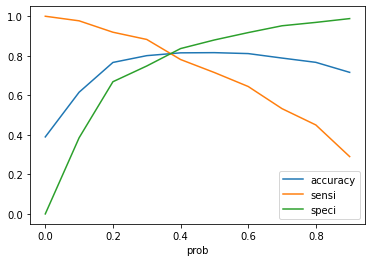

In [ ]:
# Let's plot accuracy, sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#####Insight:
 From the curve above, 0.38 is the optimum point to take it as a cutoff probability.

In [ ]:
# Let us make the final prediction using 0.38 as the cut off

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.38 else 0)
y_train_pred_final.head(20)

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.68,2240,1,1,1,1,1,1,1,1,0,0,0,1
1,0,0.55,113,1,1,1,1,1,1,1,0,0,0,0,1
2,1,0.83,4132,1,1,1,1,1,1,1,1,1,1,0,1
3,0,0.11,5573,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.01,1109,0,1,0,0,0,0,0,0,0,0,0,0
5,0,0.04,2282,0,1,0,0,0,0,0,0,0,0,0,0
6,1,0.77,2976,1,1,1,1,1,1,1,1,1,0,0,1
7,0,0.48,8431,0,1,1,1,1,1,0,0,0,0,0,1
8,1,0.83,2770,1,1,1,1,1,1,1,1,1,1,0,1
9,1,1.00,5790,1,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
# Now let us calculate the lead score

y_train_pred_final['lead_score'] = y_train_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_train_pred_final.head(20)

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,lead_score
0,0,0.68,2240,1,1,1,1,1,1,1,1,0,0,0,1,68
1,0,0.55,113,1,1,1,1,1,1,1,0,0,0,0,1,55
2,1,0.83,4132,1,1,1,1,1,1,1,1,1,1,0,1,83
3,0,0.11,5573,0,1,1,0,0,0,0,0,0,0,0,0,11
4,0,0.01,1109,0,1,0,0,0,0,0,0,0,0,0,0,1
5,0,0.04,2282,0,1,0,0,0,0,0,0,0,0,0,0,4
6,1,0.77,2976,1,1,1,1,1,1,1,1,1,0,0,1,77
7,0,0.48,8431,0,1,1,1,1,1,0,0,0,0,0,1,48
8,1,0.83,2770,1,1,1,1,1,1,1,1,1,1,0,1,83
9,1,1.00,5790,1,1,1,1,1,1,1,1,1,1,1,1,100


In [ ]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion / non conversion counts from the actual converted rates

checking_df = y_train_pred_final.loc[y_train_pred_final['Converted']==1,['Converted','final_predicted']]
checking_df['final_predicted'].value_counts()

1    1979
0     483
Name: final_predicted, dtype: int64

In [ ]:
# check the precentage of final_predicted conversions

1979/float(1979+483)

0.8038180341186028

#####Insight on prediction rate of Train data
The final prediction of conversions have a target of 80.38% conversion which should be accepted as per the X Educations CEO's requirement . Hence this is a good model.

### Model Evaluation:
Now, lets evaluate our model for the Accuracy, Confusion Metrics, Sensitivity, Specificity, False Postive Rate, Positive Predictive Value, Negative Predicitive Value on the final prediction of the train set.

#### Overall Accuracy

In [ ]:
# overall accuracy

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8153481012658228

In [ ]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3174,  684],
       [ 483, 1979]])

In [ ]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

#### Sensitivity

In [ ]:
# Sensitivity of our logistic regression model

TP / float(TP+FN)

0.8038180341186028

#### Specificity

In [ ]:
# specificity

TN / float(TN+FP)

0.8227060653188181

In [ ]:
# Calculate false postive rate - predicting conversions when leads has not converted

print(FP/ float(TN+FP))

0.17729393468118196


In [ ]:
# Positive predictive value 

print (TP / float(TP+FP))

0.7431468268869695


In [ ]:
# Negative predictive value

print (TN / float(TN+ FN))

0.8679245283018868


#### Confusion matrix

In [ ]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3395,  463],
       [ 701, 1761]])

#### Precision and recall Score

In [ ]:
from sklearn.metrics import precision_score, recall_score

In [ ]:
# precision

precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.79181654676259

In [ ]:
# recall

recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.715272136474411

#### Precision and recall tradeoff

In [ ]:
from sklearn.metrics import precision_recall_curve

In [ ]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       1
 3       0
 4       0
        ..
 6315    1
 6316    1
 6317    0
 6318    0
 6319    0
 Name: Converted, Length: 6320, dtype: int64, 0       1
 1       1
 2       1
 3       0
 4       0
        ..
 6315    0
 6316    1
 6317    0
 6318    0
 6319    0
 Name: predicted, Length: 6320, dtype: int64)

In [ ]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

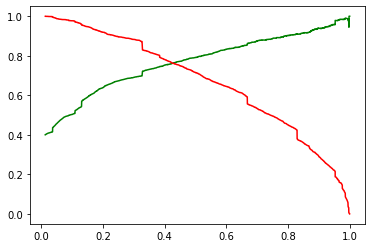

In [ ]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

# <span style="color:IndianRed ;">12. Making predictions on the test set

In [ ]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [ ]:
X_test = X_test[col]
X_test.head()

,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Not Sure,Last Activity_Olark Chat Conversation,Last Activity_Unreachable,Last Notable Activity_Email Bounced,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Lead Origin_Lead Add Form,What is your current occupation_No Information,What is your current occupation_Working Professional,Do Not Email,TotalVisits,Total Time Spent on Website
2296,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.19,0.67
8697,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.44,0.18
7378,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.12,0.16
8631,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.31,0.41
4799,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.50,0.74


In [ ]:
X_test_sm = sm.add_constant(X_test)

In [ ]:
y_test_pred = res.predict(X_test_sm)

In [ ]:
y_test_pred[:10]

2296   0.91
8697   0.60
7378   0.19
8631   0.46
4799   0.95
4503   0.38
7129   0.94
1717   0.13
8398   0.90
5116   0.33
dtype: float64

In [ ]:
# Converting y_pred to a dataframe which is an array

y_pred_1 = pd.DataFrame(y_test_pred)

In [ ]:
# Let's see the head

y_pred_1.head()

,0
2296,0.91
8697,0.60
7378,0.19
8631,0.46
4799,0.95


In [ ]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [ ]:
# Putting LeadId to index

y_test_df['LeadId'] = y_test_df.index

In [ ]:
# Removing index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [ ]:
# Appending y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [ ]:
y_pred_final.head()

,Converted,LeadId,0
0,1,2296,0.91
1,0,8697,0.60
2,0,7378,0.19
3,0,8631,0.46
4,1,4799,0.95


In [ ]:
# Renaming the column 

y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [ ]:
y_pred_final.head()

,Converted,LeadId,Converted_Prob
0,1,2296,0.91
1,0,8697,0.60
2,0,7378,0.19
3,0,8631,0.46
4,1,4799,0.95


In [ ]:
# Based on cut off threshold using accuracy, sensitivity and specificity of 0.38%

y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.38 else 0)

In [ ]:
y_pred_final.head()

,Converted,LeadId,Converted_Prob,final_predicted
0,1,2296,0.91,1
1,0,8697,0.60,1
2,0,7378,0.19,0
3,0,8631,0.46,1
4,1,4799,0.95,1


## Lead Scoring

In [ ]:
# Now let us calculate the lead score

y_pred_final['lead_score'] = y_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_pred_final.head(20)

,Converted,LeadId,Converted_Prob,final_predicted,lead_score
0,1,2296,0.91,1,91
1,0,8697,0.60,1,60
2,0,7378,0.19,0,19
3,0,8631,0.46,1,46
4,1,4799,0.95,1,95
5,0,4503,0.38,1,38
6,0,7129,0.94,1,94
7,0,1717,0.13,0,13
8,0,8398,0.90,1,90
9,1,5116,0.33,0,33


In [ ]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion or non conversion counts from the actual converted rates

checking_test_df = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','final_predicted']]
checking_test_df['final_predicted'].value_counts()

1    807
0    208
Name: final_predicted, dtype: int64

In [ ]:
# check the precentage of final_predicted conversions on test data

807/float(807+208)

0.7950738916256158

#####**Insight on prediction rate of Test data:**
 The final prediction of conversions have a target rate of 79.5% and is accptable against 80.3% of the predictions rate on training data set

##### Overall Accuracy


In [ ]:
# Let's check the accuracy.

metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8132152085640457

##### Confusion Metrics

In [ ]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1396,  298],
       [ 208,  807]])

In [ ]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

##### Sensitivity

In [ ]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7950738916256158

##### Specificity

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)

0.8240850059031877


##### Precision and Recall Score

In [ ]:
# precision
print('precision ',precision_score(y_pred_final.Converted, y_pred_final.final_predicted))

# recall
print('recall ',recall_score(y_pred_final.Converted, y_pred_final.final_predicted))

precision  0.7303167420814479
recall  0.7950738916256158


##### Precision and Recall Tradeoff

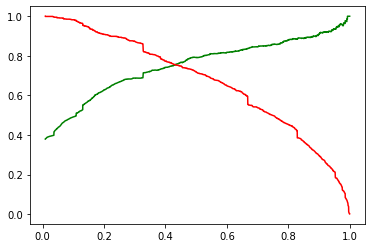

In [ ]:

p, r, thresholds = precision_recall_curve(y_pred_final.Converted, y_pred_final.Converted_Prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

# <span style="color:IndianRed ;">13. Conclusion
    
- Built the model with above 80% predicition rate.
- Tested the model with 79.5% prediction rate.
- Created a Lead score for each lead, which indicates the chances of it being converted. Higher Lead score depicts a better chances of being converted.
- Checked and evaluated the model on below parameters for both train and test dataset:
    - Overall Accuracy
    - Sensitivity
    - Specificity 
    - Confusion Matrix
    - Precision and Recall Score

- Calculated the final prediction based on the optimal cut-off obtained through above parameters.
- Also the lead score calculated in the trained set of data shows the conversion rate on the final predicted model is around 80%.
- Overall, the model looks good on all the parameters.